In [6]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
train_dir = "../../../Documents/ASL_Dataset/Train";
test_dir = "../../../Documents/ASL_Dataset/Test";

In [8]:
Name=[]
for file in os.listdir(train_dir):
    Name+=[file]
print(Name)
print(len(Name))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'Nothing', 'O', 'P', 'Q', 'R', 'S', 'Space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
28


In [9]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [10]:
dataset=[]
count=0
for file in os.listdir(train_dir):
    path=os.path.join(train_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        dataset+=[[image,count]]
    count=count+1

In [11]:
testset=[]
count=0
for file in os.listdir(test_dir):
    path=os.path.join(test_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(40,40))
        image=img_to_array(image)
        image=image/255.0
        testset+=[[image,count]]
    count=count+1

In [12]:
data,labels0=zip(*dataset)
test,testlabels0=zip(*testset)

In [13]:
labels1=to_categorical(labels0)
labels=np.array(labels1)

In [14]:
data=np.array(data)
test=np.array(test)

In [15]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [16]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(132536, 40, 40, 3)
(33134, 40, 40, 3)
(132536, 28)
(33134, 28)


In [17]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [18]:
# pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(40,40,3),include_top=False,weights='imagenet',pooling='avg')
# pretrained_model3.trainable = False

In [19]:
# inputs3 = pretrained_model3.input
# x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
# outputs3 = tf.keras.layers.Dense(28, activation='softmax')(x3)
# model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [20]:
model = tf.keras.Sequential([
    tf.keras.Input((40,40,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(28, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 40, 40, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 20, 20, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 20, 32)        0         
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 28)                358428    
                                                                 
Total params: 360,860
Trainable params: 360,860
Non-trainable params: 0
__________________________________________________

In [21]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=128),validation_data=(testx,testy),epochs=8)

Epoch 1/8
1036/1036 [==============================] - 69s 66ms/step - loss: 1.9040 - accuracy: 0.4090 - val_loss: 0.8973 - val_accuracy: 0.7298
Epoch 2/8
1036/1036 [==============================] - 68s 66ms/step - loss: 1.1451 - accuracy: 0.6157 - val_loss: 0.6060 - val_accuracy: 0.8387
Epoch 3/8
1036/1036 [==============================] - 68s 66ms/step - loss: 0.9408 - accuracy: 0.6799 - val_loss: 0.4509 - val_accuracy: 0.8799
Epoch 4/8
1036/1036 [==============================] - 67s 65ms/step - loss: 0.8083 - accuracy: 0.7239 - val_loss: 0.4296 - val_accuracy: 0.8654
Epoch 5/8
1036/1036 [==============================] - 67s 65ms/step - loss: 0.7402 - accuracy: 0.7451 - val_loss: 0.3430 - val_accuracy: 0.9045
Epoch 6/8
1036/1036 [==============================] - 70s 67ms/step - loss: 0.6686 - accuracy: 0.7697 - val_loss: 0.3362 - val_accuracy: 0.9076
Epoch 7/8
1036/1036 [==============================] - 70s 67ms/step - loss: 0.6209 - accuracy: 0.7854 - val_loss: 0.2959 - val_ac

In [23]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

1036/1036 [==============================] - 3s 3ms/step
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1222
           1       1.00      0.87      0.93      1201
           2       0.99      0.99      0.99      1189
           3       1.00      1.00      1.00      1200
           4       1.00      0.50      0.67      1220
           5       0.99      1.00      0.99      1199
           6       1.00      0.85      0.92      1169
           7       0.92      0.93      0.93      1167
           8       0.59      1.00      0.74      1183
           9       0.95      1.00      0.97      1216
          10       1.00      0.90      0.94      1211
          11       1.00      0.97      0.98      1155
          12       0.93      0.78      0.85      1211
          13       0.95      0.81      0.87      1257
          14       1.00      1.00      1.00      1195
          15       0.92      1.00      0.96      1156
          16       0.99 

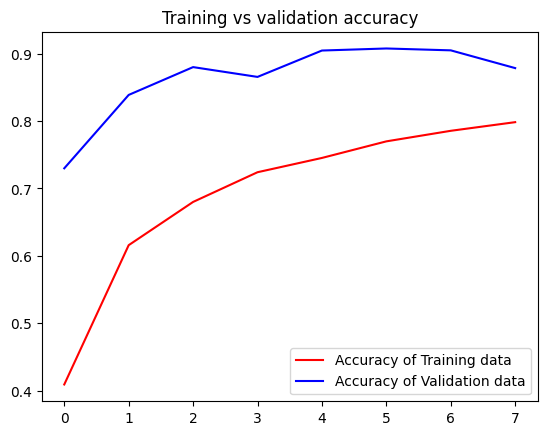

<Figure size 640x480 with 0 Axes>

In [24]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

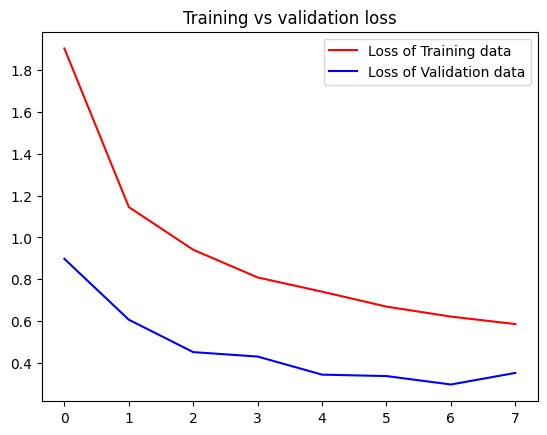

<Figure size 640x480 with 0 Axes>

In [25]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [26]:
diretorio = test_dir + "/M/3001.jpg"

image=load_img(diretorio,target_size=(40,40))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)

In [27]:
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
print("Prediction is {}.".format(move_name))

1/1 [==============================] - 0s 13ms/step
Prediction is M.


In [28]:
print(test.shape)
pred2=model.predict(test)
print(pred2.shape)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]

(112, 40, 40, 3)
4/4 [==============================] - 0s 3ms/step
(112, 28)


In [29]:
print(PRED)

[0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 8, 8, 8, 8, 5, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 25, 25, 25, 25, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17, 18, 18, 18, 18, 25, 25, 25, 19, 20, 20, 20, 20, 21, 21, 21, 21, 25, 25, 25, 25, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27]


In [30]:
ANS=testlabels0

In [31]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.8660714285714286


In [32]:
from sklearn.metrics import confusion_matrix

#Create confusion matrix and normalizes it over predicted (columns)
pred3=model.predict(test)
pred3= np.argmax(pred2, axis = 1)
y_teste2 = np.argmax(test, axis=1)
print(y_teste2.shape)
print(pred3)
result = confusion_matrix(testlabels0, pred3 , normalize='pred')
print(result)

4/4 [==============================] - 0s 3ms/step
(112, 40, 3)
[ 0  0  0  0  1  1  1  1  2  2  2  2  3  3  3  3  8  8  8  8  5  5  5  5
  6  6  6  6  7  7  7  7  8  8  8  8  9  9  9  9 10 10 10 10 11 11 11 11
 12 12 12 12 25 25 25 25 14 14 14 14 15 15 15 15 16 16 16 16 17 17 17 17
 18 18 18 18 25 25 25 19 20 20 20 20 21 21 21 21 25 25 25 25 23 23 23 23
 24 24 24 24 25 25 25 25 26 26 26 26 27 27 27 27]
[[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.     

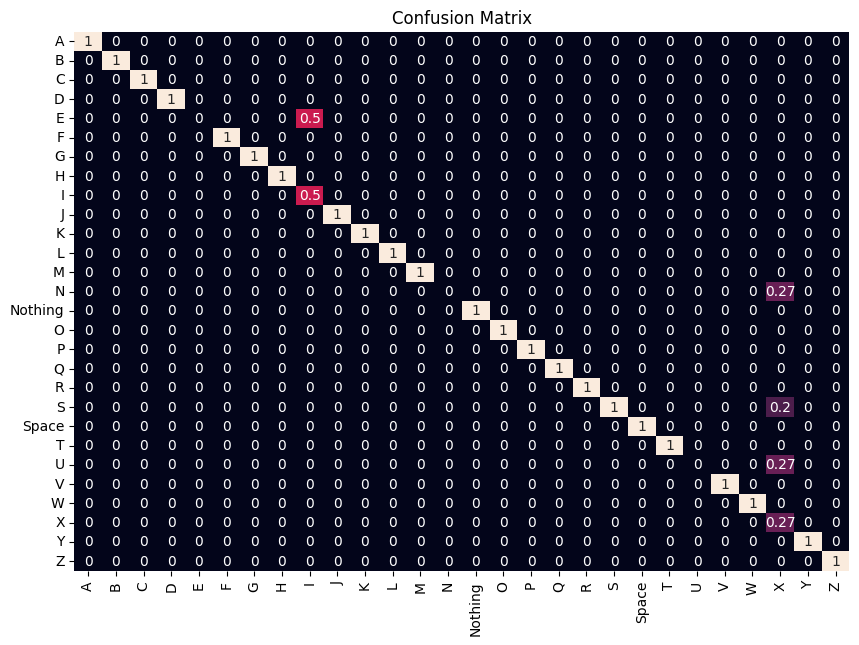

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt
import pandas as pd

df_result_under = pd.DataFrame(result, index = Name, columns = Name)
plt.figure(figsize = (10,7))
axes = plt.axes()
result_under_plot = sn.heatmap(df_result_under, annot=True, cbar = False, ax=axes)
plt.title("Confusion Matrix")
result_under_plot.figure.savefig("confusionMatrix.png")